**Student Performance Predictor**

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("./student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [155]:
df.shape
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


**Normalizing Values**

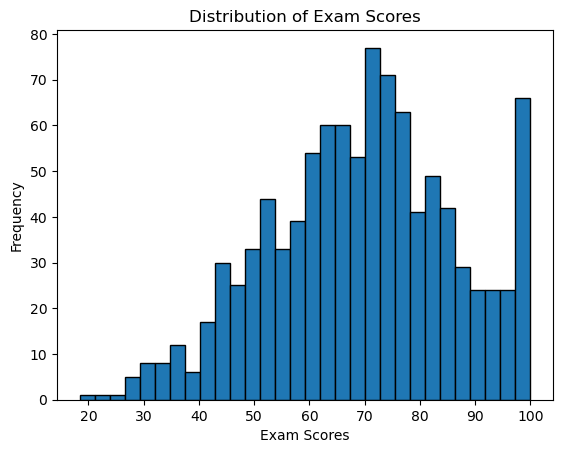

In [156]:
plt.hist(df["exam_score"], bins=30, edgecolor='black')
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Scores")
plt.ylabel("Frequency")
plt.show()
#Z score normalized

Via the distributions the scores look top heavy

In [157]:
df.isna().sum()
if(df.isna().any().any()):
    # Drop rows if with na in them
    df.dropna()

In [158]:

df["part_time_job"]= df["part_time_job"].map({"Yes": 1, "No":0})
categorical_cols = ["gender", "diet_quality"]
numeric_cols = ["age", "study_hours_per_day", "sleep_hours", "attendance_percentage","mental_health_rating", "social_media_hours","netflix_hours"]

used_features = numeric_cols + categorical_cols + ["part_time_job"]

colTrans = ColumnTransformer([
    ("scaling", StandardScaler(), numeric_cols),
    ("onehot", OneHotEncoder(), categorical_cols)
], remainder = "passthrough")

colTrans



ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling', StandardScaler(),
                                 ['age', 'study_hours_per_day', 'sleep_hours',
                                  'attendance_percentage',
                                  'mental_health_rating', 'social_media_hours',
                                  'netflix_hours']),
                                ('onehot', OneHotEncoder(),
                                 ['gender', 'diet_quality'])])

In [159]:
y = df["exam_score"]
X = df[used_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ("transformer", colTrans),
    # Changes alpha 
    ("estimator", Ridge(alpha = 1))
    
     ])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'sleep_hours',
                                                   'attendance_percentage',
                                                   'mental_health_rating',
                                                   'social_media_hours',
                                                   'netflix_hours']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['gender',
                                                   'diet_quality'])])),
                ('estimator', Ridge(alpha=1))])

In [160]:
prediction = pipeline.predict(X_test)

#
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)
print(f"MSE: {mse}\nRMSE:{rmse} \nR2: {r2}")




MSE: 41.16390022379766
RMSE:6.415909929526572 
R2: 0.8394725837827792


**R^2 Values using Different Linear Regression Types**

.66 Ridge  
.65 Linear Regression
.65 Lasso

categorical_cols = ["gender", "diet_quality"]

numeric_cols = ["age", "study_hours_per_day", "sleep_hours", "attendance_percentage"]

Ridge is better, lower MSE and RMSE
